# TASK - 3
Car Price Prediction

In [52]:
# Importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Knowing About Data

In [53]:
data_dict = pd.read_excel("Data Dictionary - carprices.xlsx")

In [54]:
data_dict = data_dict.iloc[3:28,[7,11]]

In [55]:
data_dict.columns = ["Column","Description"]

In [56]:
data_dict

,Column,Description
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of..."
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


# Importing DATA

In [57]:
data = pd.read_csv("CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [59]:
# As we know knowing the model of the car is of no use so we will try to remove the model and keep the company name .
data["CarName"] = data.CarName.apply(lambda x : x.split(" ")[0])

In [60]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Now we can see that some of the companies such as toyota , volkswagen, mazda has their names spelled wrongly in some of the places .


In [61]:
data["CarName"] = data["CarName"].replace({"maxda"     : "mazda"})
data["CarName"] = data["CarName"].replace({"toyouta"   : "toyota"})
data["CarName"] = data["CarName"].replace({"vokswagen" : "volkswagen"})
data["CarName"] = data["CarName"].replace({"vw"        : "volkswagen"})
data["CarName"] = data["CarName"].replace({"maxda"     : "mazda"})
data["CarName"] = data["CarName"].replace({"porcshce"  : "porsche"})
data["CarName"] = data["CarName"].replace({"Nissan"    : "nissan"})

In [62]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [63]:
# Symboling is a data catgeorical columns but is represented as a categorical column.
data["symboling"] = data["symboling"].astype("object")

In [64]:
data.symboling

0       3
1       3
2       1
3       2
4       2
       ..
200    -1
201    -1
202    -1
203    -1
204    -1
Name: symboling, Length: 205, dtype: object

# 1. Exploratory Data Analysis

# 1.1 Categorical Analaysis

In [65]:
data_categorical = data.select_dtypes(include="object")
data_numerical   = data.select_dtypes(exclude="object")

In [66]:
data_categorical

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [67]:
plt.style.use("Solarize_Light2")
def Plot(dataset,features):
    plt.figure(figsize=(10,8))
    
    plt.subplot(1,2,1)
    plt.pie(x = dataset[features].value_counts(),labels = dataset[features].unique(),autopct = "%.2f")
    plt.legend()
    plt.title("Pie Chart")
    
    plt.subplot(1,2,2)
    plt.bar(x = dataset[features].unique(),height = dataset[features].value_counts(),color="lightblue")
    plt.title("Bar Plot")    
    
    plt.suptitle(f"{features}")

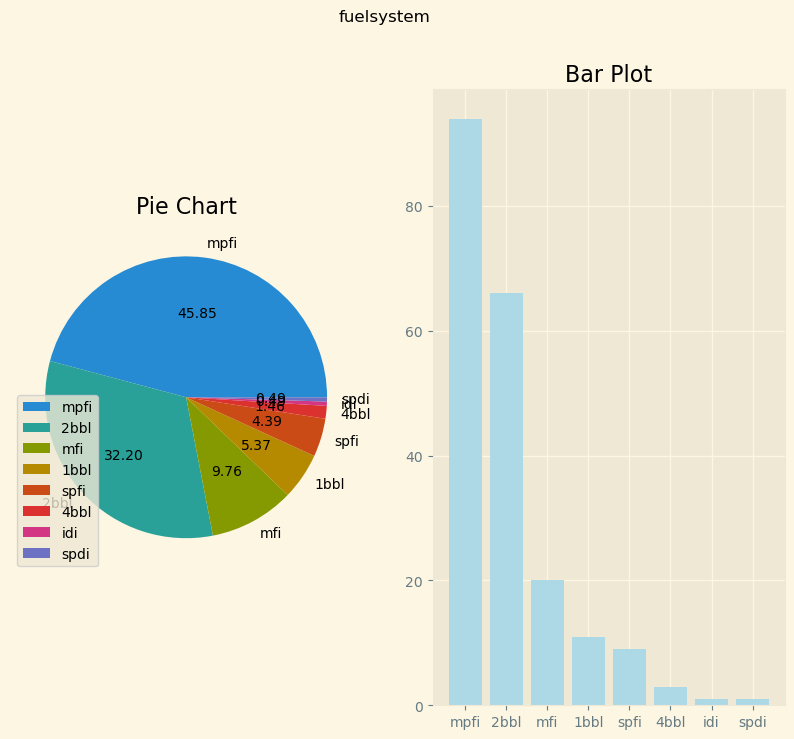

In [68]:
Plot(data_categorical,"fuelsystem")

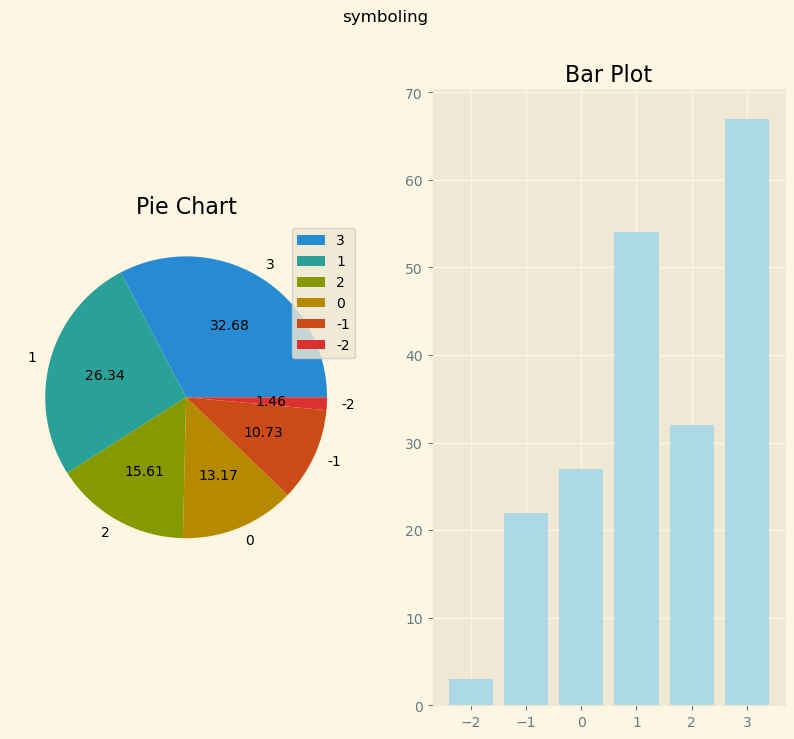

In [69]:
Plot(data_categorical,"symboling")

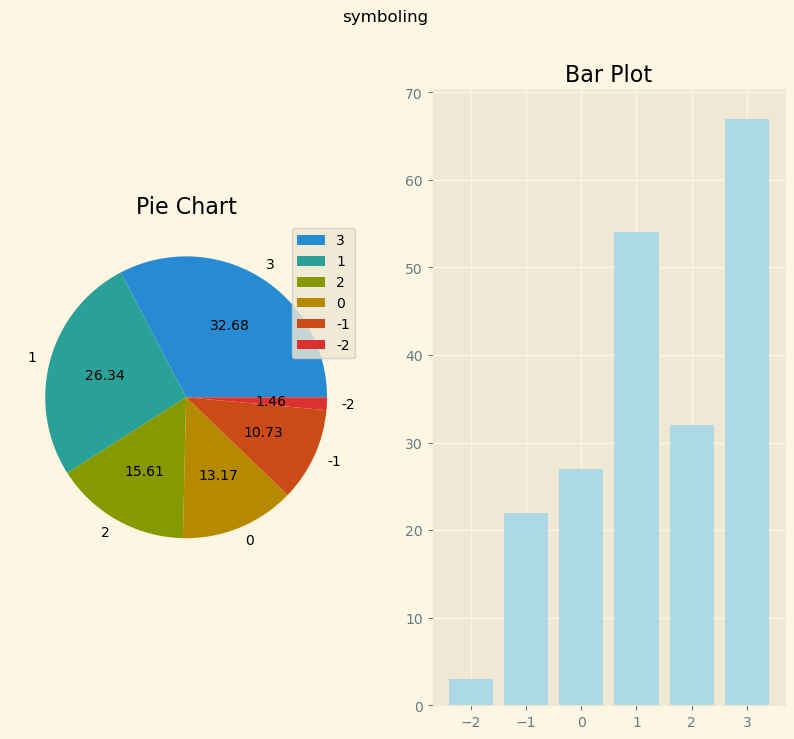

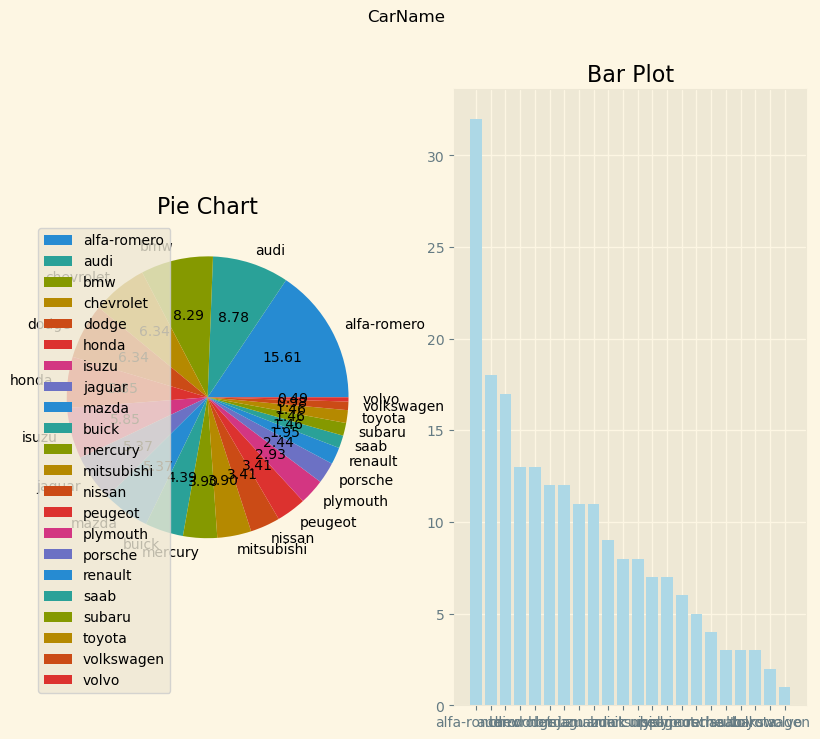

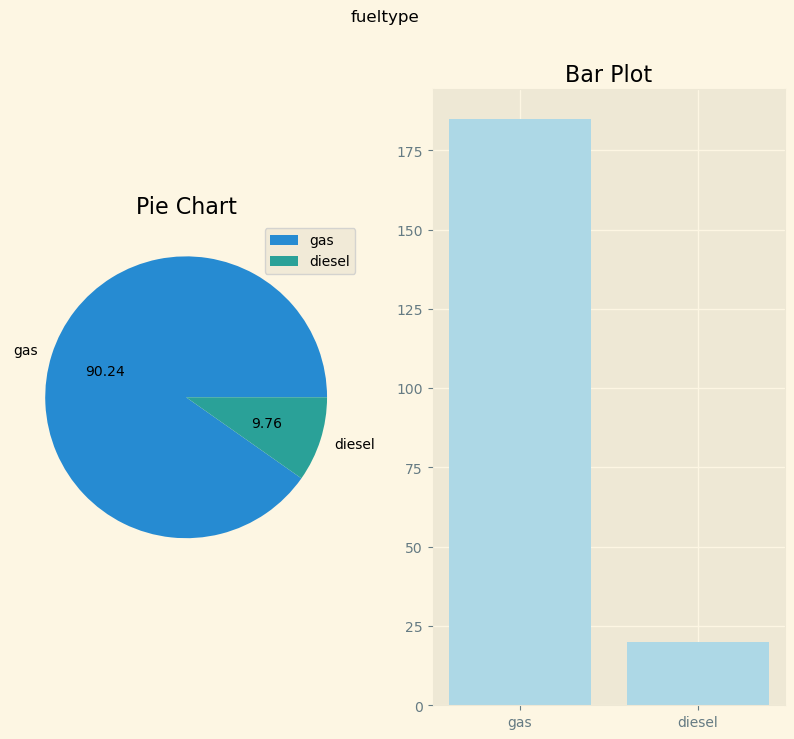

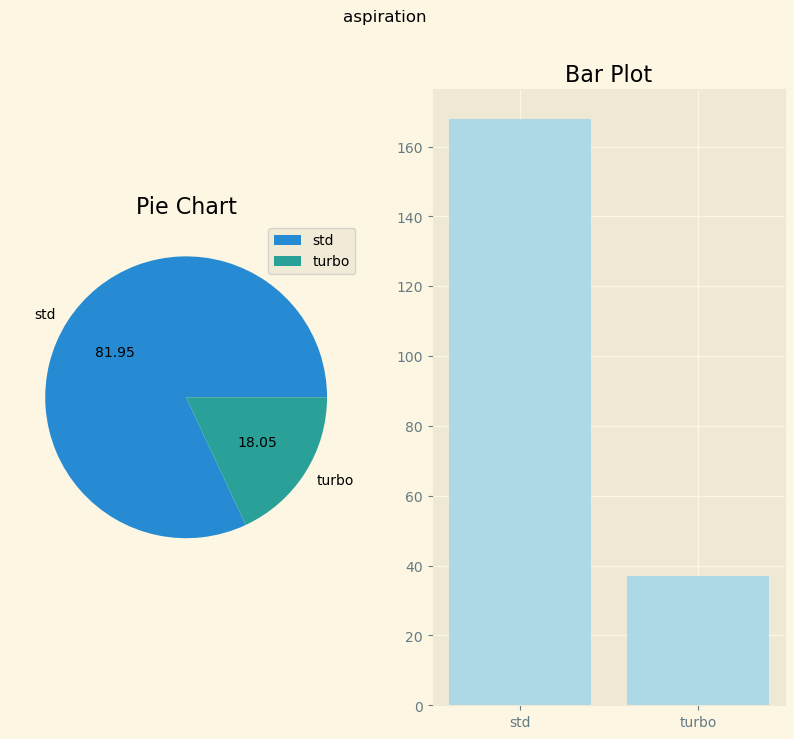

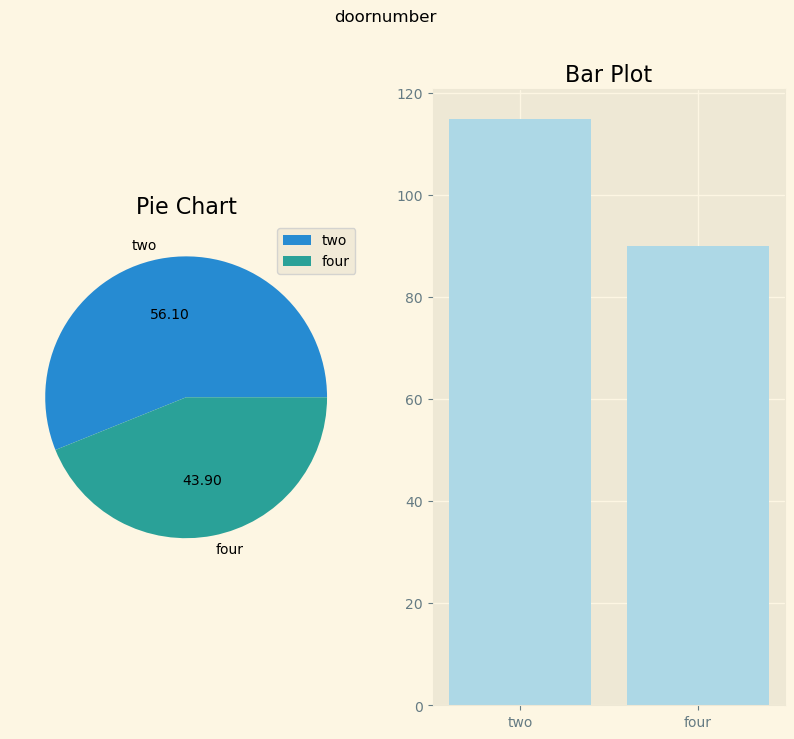

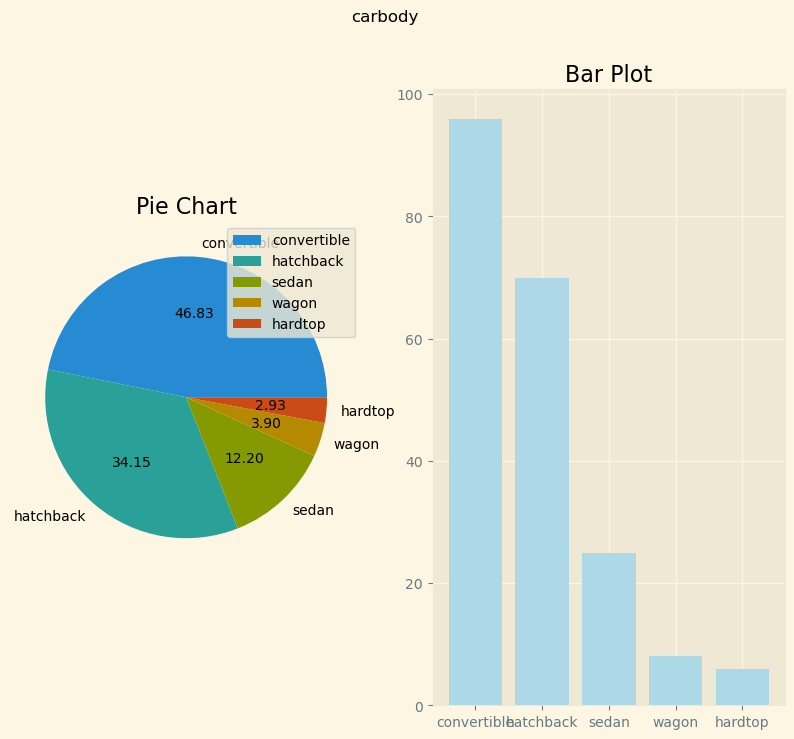

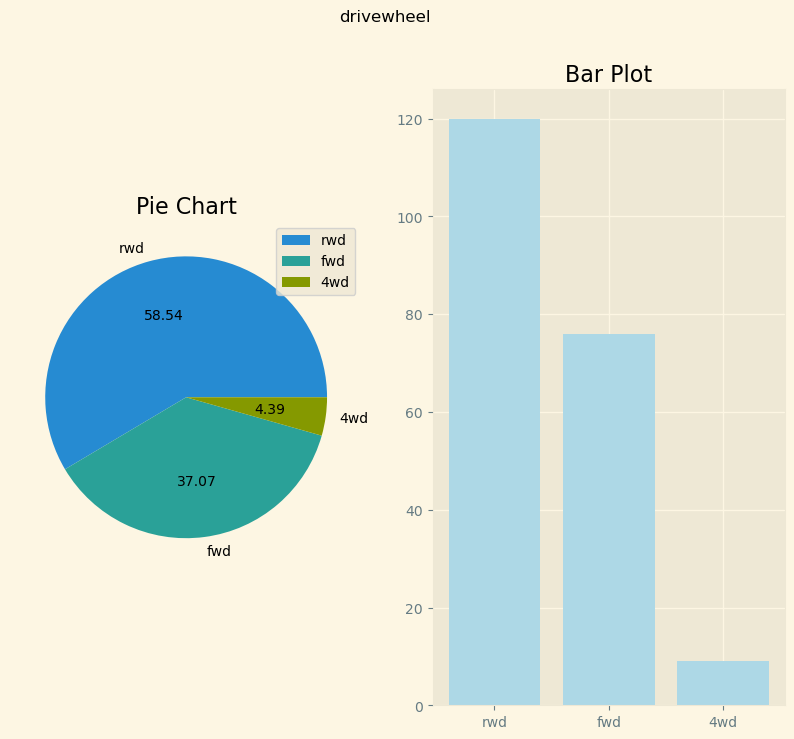

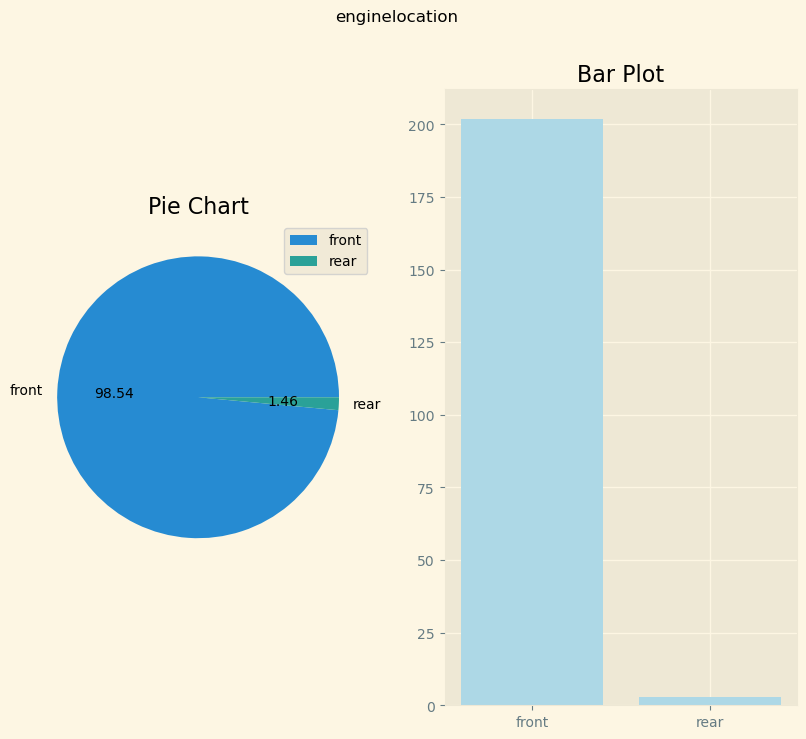

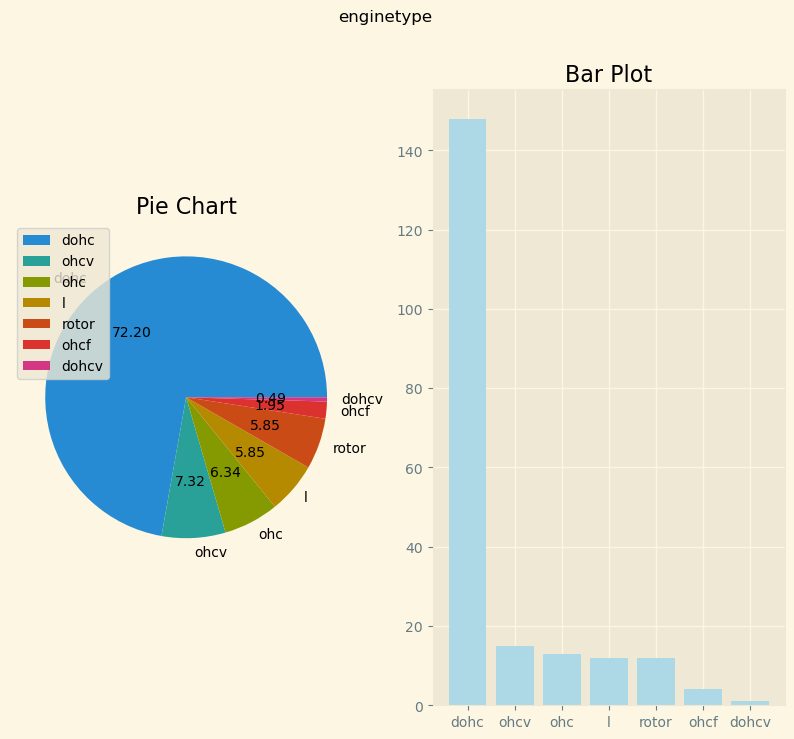

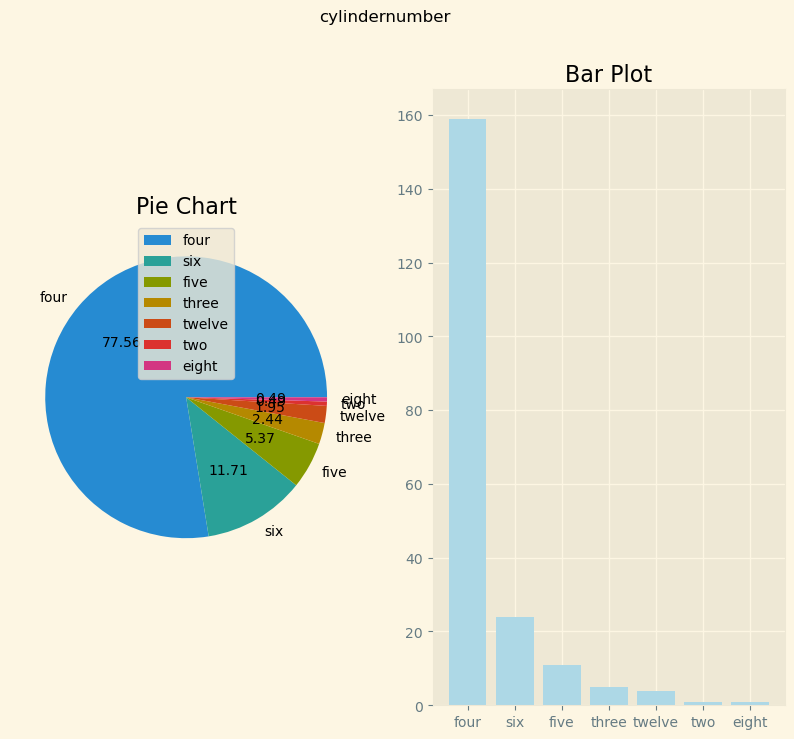

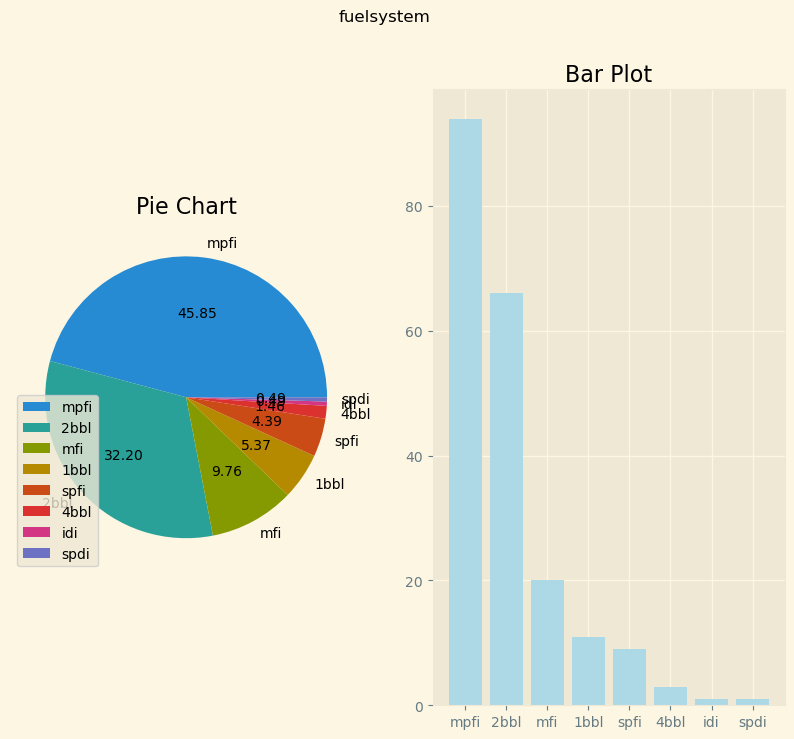

In [70]:
for i in data_categorical.columns:
    Plot(data_categorical,i)

# 1.2 Numerical Columns Analysis

In [71]:
data_numerical

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [72]:
def maxmin(dataset,features):
    print(f"The maximum value of {features} is :", dataset[features].max() )
    print(f"The maximum value of {features} is :", dataset[features].min() )    
    print("=="*20)

In [73]:
for i in data_numerical:
    maxmin(data_numerical,i)

The maximum value of car_ID is : 205
The maximum value of car_ID is : 1
The maximum value of wheelbase is : 120.9
The maximum value of wheelbase is : 86.6
The maximum value of carlength is : 208.1
The maximum value of carlength is : 141.1
The maximum value of carwidth is : 72.3
The maximum value of carwidth is : 60.3
The maximum value of carheight is : 59.8
The maximum value of carheight is : 47.8
The maximum value of curbweight is : 4066
The maximum value of curbweight is : 1488
The maximum value of enginesize is : 326
The maximum value of enginesize is : 61
The maximum value of boreratio is : 3.94
The maximum value of boreratio is : 2.54
The maximum value of stroke is : 4.17
The maximum value of stroke is : 2.07
The maximum value of compressionratio is : 23.0
The maximum value of compressionratio is : 7.0
The maximum value of horsepower is : 288
The maximum value of horsepower is : 48
The maximum value of peakrpm is : 6600
The maximum value of peakrpm is : 4150
The maximum value of c

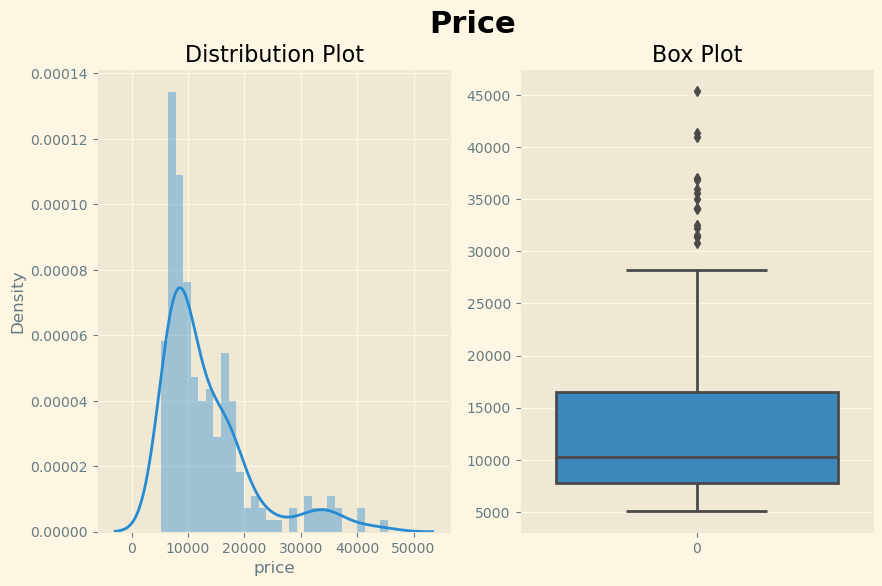

In [74]:
# Price Column
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Distribution Plot")
sns.distplot(data_numerical["price"],bins=30)

plt.subplot(1,2,2)
plt.title("Box Plot")
plt.subplot(1,2,2)
sns.boxplot(data_numerical["price"])

plt.suptitle("Price",fontsize=22,fontweight="bold");

# 1.3 Dual Analysis 

# 1.3.1 SCATTER PLOTS

<Axes: xlabel='highwaympg', ylabel='price'>

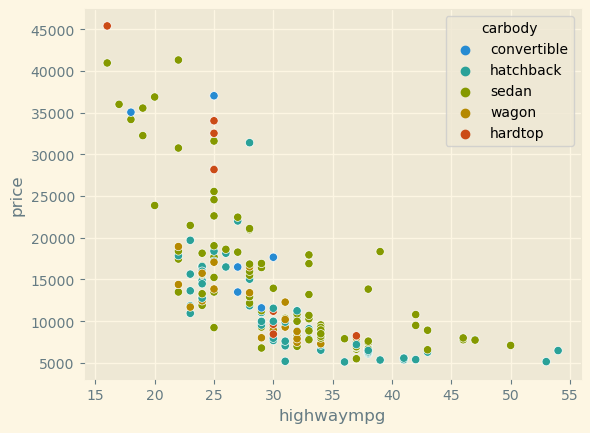

In [75]:
# Plot between highway mpg VS Price on basis of carbody
sns.scatterplot(x=data["highwaympg"],y=data["price"],hue="carbody",data=data)

<Axes: xlabel='highwaympg', ylabel='price'>

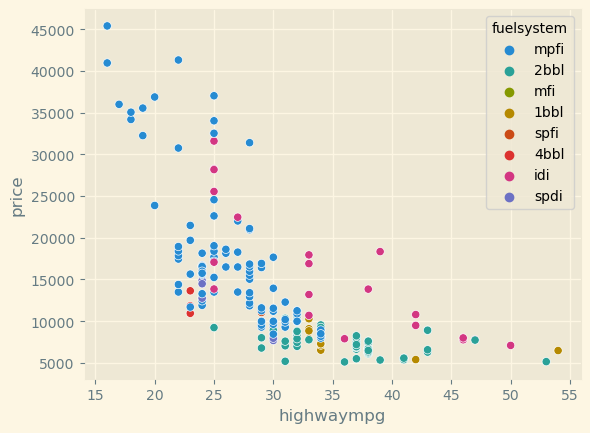

In [76]:
# Plot between highway mpg VS Price on basis of fuelsystem
sns.scatterplot(x=data["highwaympg"],y=data["price"],hue="fuelsystem",data=data)

<Axes: xlabel='citympg', ylabel='price'>

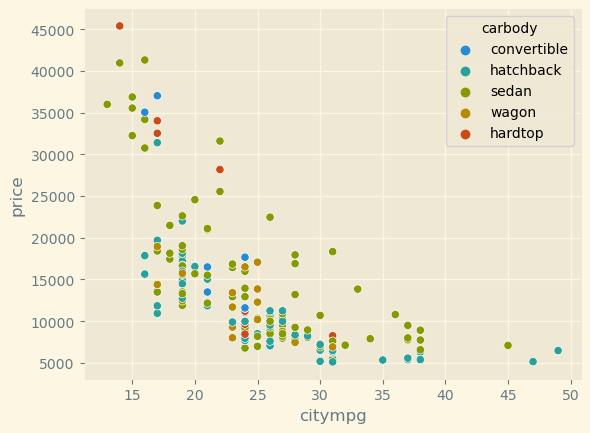

In [77]:
# Plot between city mpg VS Price on basis of citympg
sns.scatterplot(x=data["citympg"],y=data["price"],hue="carbody",data=data)

<Axes: xlabel='citympg', ylabel='price'>

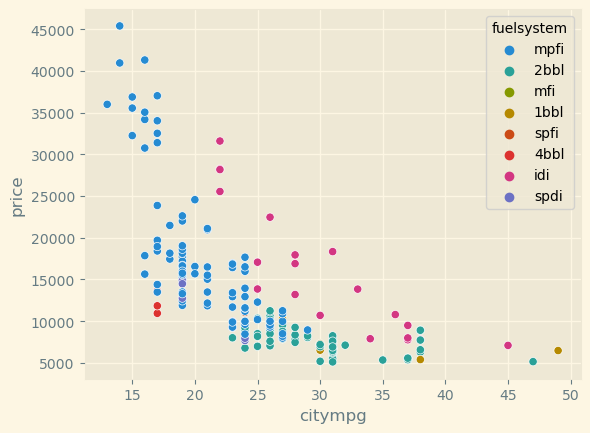

In [78]:
# Plot between city mpg VS Price on basis of fuelsystem
sns.scatterplot(x=data["citympg"],y=data["price"],hue="fuelsystem",data=data)

<Axes: xlabel='highwaympg', ylabel='citympg'>

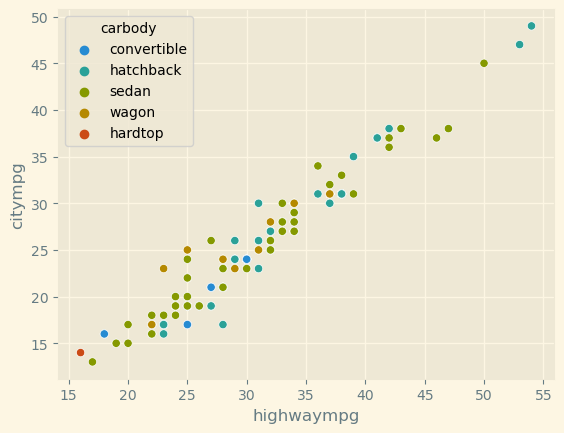

In [79]:
sns.scatterplot(x=data["highwaympg"],y=data["citympg"],hue=data["carbody"])

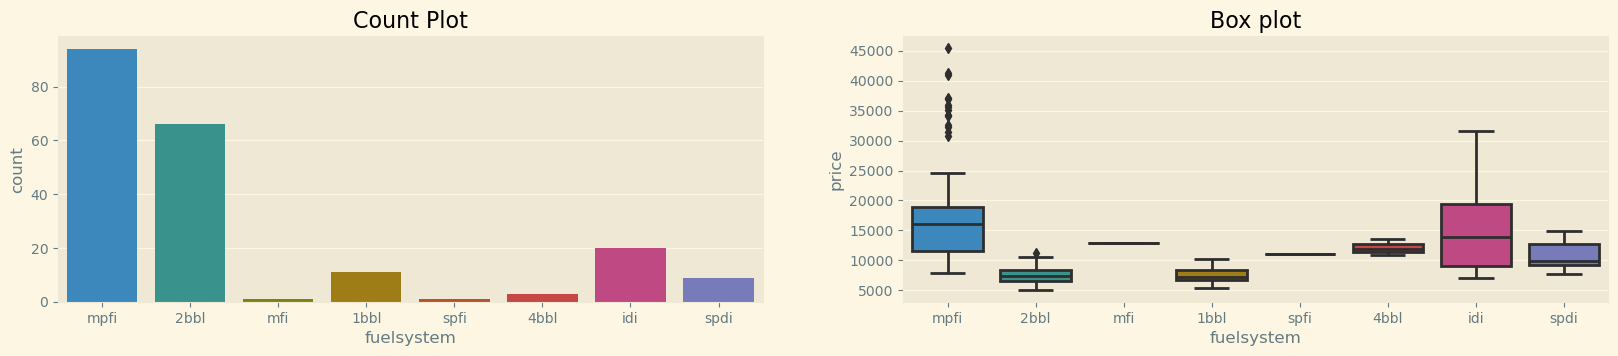

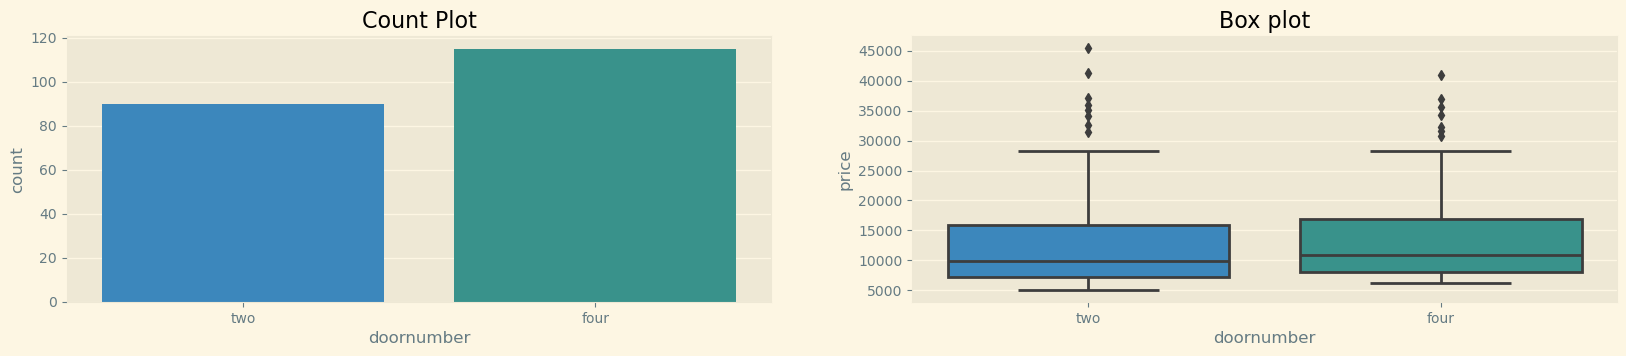

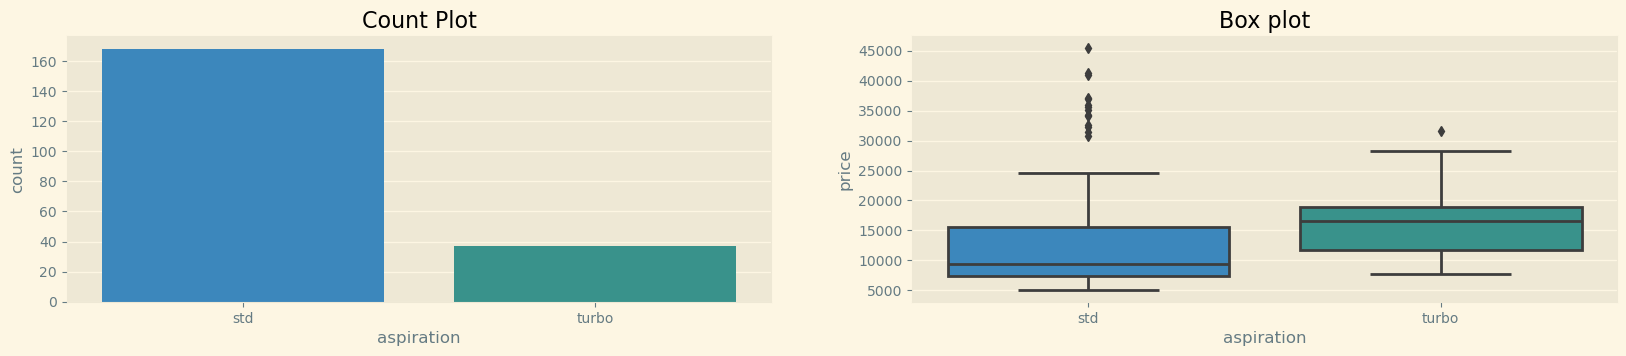

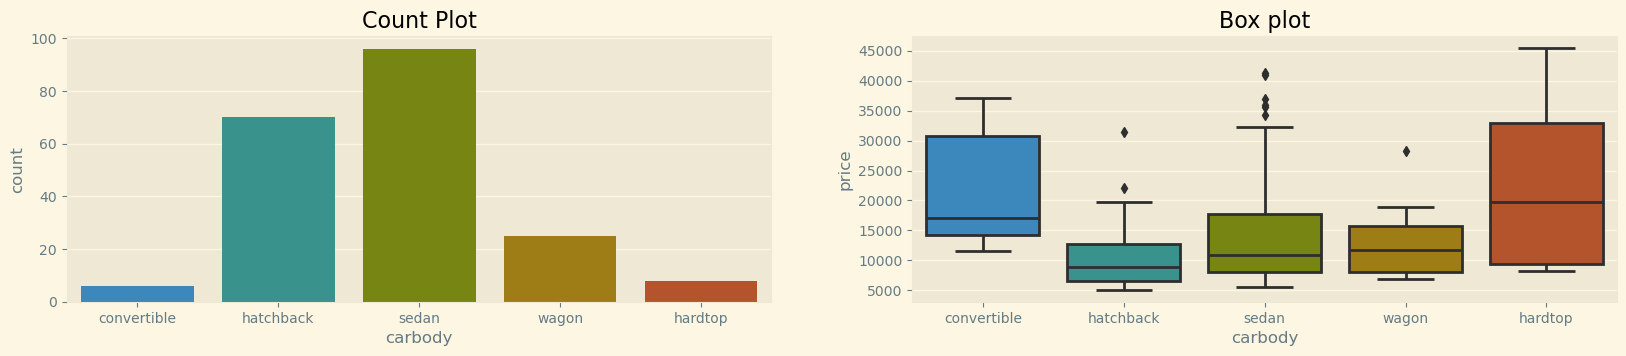

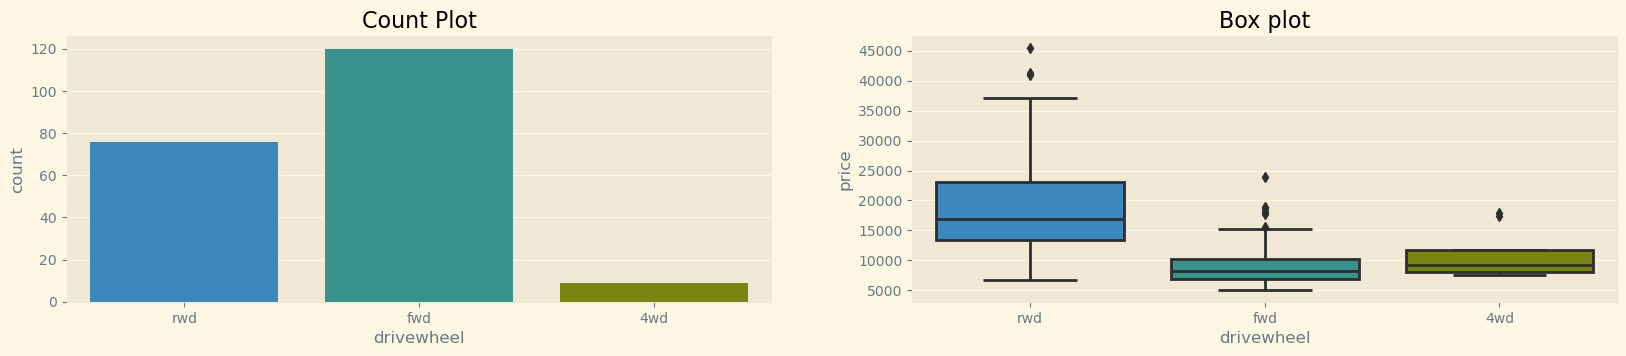

In [80]:
def plotCat(features,fig):
    
    plt.figure(figsize=(20,20))
    
    plt.subplot(5,2,fig)
    plt.title("Count Plot")
    sns.countplot(data=data,x=data[features])
    
    plt.subplot(5,2,(fig+1))
    plt.title("Box plot")
    sns.boxplot(data=data,x=features,y="price")
    
plotCat("fuelsystem",1)
plotCat("doornumber",3)
plotCat("aspiration",5)
plotCat("carbody",7)
plotCat("drivewheel",9)

In [81]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [82]:
# Extracting main features:
data = data[["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype",
             "curbweight","cylindernumber","horsepower","citympg","highwaympg","price"]]

data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,curbweight,cylindernumber,horsepower,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,2548,four,111,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,2548,four,111,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,2823,six,154,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,ohc,2337,four,102,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,ohc,2824,five,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,ohc,2952,four,114,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,3049,four,160,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,3012,six,134,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,3217,six,106,26,27,22470.0


In [83]:
cols_to_decode = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber"]
temp = pd.get_dummies(data[cols_to_decode],drop_first=True)
data = pd.concat([data,temp],axis=1)

In [84]:
data.drop(data[cols_to_decode],axis=1,inplace=True)

In [85]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cols_to_scale = ["curbweight","horsepower","citympg","highwaympg","price"]
sc = StandardScaler()
data[cols_to_scale] = sc.fit_transform(data[cols_to_scale])

In [86]:
from sklearn.model_selection import train_test_split
X = data.drop("price",axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


In [87]:
print("The shape of X_train is :",X_train.shape)
print("The shape of X_test is :",X_test.shape)
print("The shape of y_train is :",y_train.shape)
print("The shape of y_test is :",y_test.shape)

The shape of X_train is : (143, 48)
The shape of X_test is : (62, 48)
The shape of y_train is : (143,)
The shape of y_test is : (62,)


# Modelling 

# 1. Linear Modelling

In [88]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
model1_mse = mean_squared_error(y_test,y_pred1)
model1_r2_score = r2_score(y_test,y_pred1)

In [89]:
print("The Linear Model mse is given by :",model1_mse)
print("The Linear Model r2_score is given by :",model1_r2_score)

The Linear Model mse is given by : 0.16340275903096127
The Linear Model r2_score is given by : 0.7853720795094461


# 2. Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.1)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
model2_mse = mean_squared_error(y_test,y_pred2)
model2_r2_score = r2_score(y_test,y_pred2)

In [91]:
print("The Linear Model mse is given by :",model2_mse)
print("The Linear Model r2_score is given by :",model2_r2_score)

The Linear Model mse is given by : 0.11822795268803653
The Linear Model r2_score is given by : 0.8447087443334976


# 3. Lasso Regression


In [92]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.1)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
model3_mse = mean_squared_error(y_test,y_pred3)
model3_r2_score = r2_score(y_test,y_pred3)

In [93]:
print("The Lasso Model mse is given by :",model3_mse)
print("The Lasso Model r2_score is given by :",model3_r2_score)

The Lasso Model mse is given by : 0.17133594741203564
The Lasso Model r2_score is given by : 0.7749519144205127


# 4. SVM


In [94]:
from sklearn.svm import SVR
model4 = SVR(kernel="rbf", gamma=0.5, C=1.0)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
model4_mse = mean_squared_error(y_test,y_pred4)
model4_r2_score = r2_score(y_test,y_pred4)

In [95]:
print("The SVM mse is given by :",model3_mse)
print("The SVM r2_score is given by :",model3_r2_score)

The SVM mse is given by : 0.17133594741203564
The SVM r2_score is given by : 0.7749519144205127
